# Citibike - Statistical Analysis Project

<i>August 2020</i>

- <u>About the Data:</u>
    - https://www.citibikenyc.com/system-data
- <u>Data Source:</u>    
    - https://s3.amazonaws.com/tripdata/index.html<br>
- <u>Data Date Range:</u>
    - Jan-June 2019 & Jan-June 2020

## About the Data

<u>Data Columns:</u>
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

<u>Additional Notes:</u>
- Test trips & trips < 60 seconds (potentially false starts or users tyring to redock bike) have been removed.
- Milage estimates are calculated using an assumed speed of 7.456 miles per hour, up to two hours. Trips over two hours max-out at 14.9 miles. Once you opt into Ride Insights, the Citi Bike app will use your phone's location to record the route you take between your starting and ending Citi Bike station to give exact mileage.
- We only include trips that begin at publicly available stations (thereby excluding trips that originate at our depots for rebalancing or maintenance purposes).

## Setup

### Import libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import plotly.express as px
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%f' % x)
pd.options.display.float_format = '{:,}'.format

C:\Users\Grace\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import data

In [2]:
os.getcwd()

'C:\\Users\\Grace\\Documents\\My_Git_Repos\\citibike-analysis'

In [3]:
os.chdir("data/2019") 

In [4]:
os.listdir()

['201901-citibike-tripdata.csv',
 '201902-citibike-tripdata.csv',
 '201903-citibike-tripdata.csv',
 '201904-citibike-tripdata.csv',
 '201905-citibike-tripdata.csv',
 '201906-citibike-tripdata.csv',
 'df_2019.pickle']

In [5]:
# import all 2019 files into a list of dataframes
dfs_2019 = []
for file in os.listdir():
    dfs_2019.append(pd.read_csv(file))

In [6]:
# concatenate all dataframes into a single dataframe
df_2019 =pd.concat(dfs_2019,ignore_index=True)

In [7]:
df_2019.shape

(9055018, 15)

In [8]:
# pickle the dataframe for easy re-import
df_2019.to_pickle('df_2019.pickle')

In [13]:
os.chdir("..") 

In [15]:
os.getcwd()

'C:\\Users\\Grace\\Documents\\My_Git_Repos\\citibike-analysis\\data'

In [16]:
os.chdir('2020')

In [17]:
os.listdir()

['202001-citibike-tripdata.csv',
 '202002-citibike-tripdata.csv',
 '202003-citibike-tripdata.csv',
 '202004-citibike-tripdata.csv',
 '202005-citibike-tripdata.csv',
 '202006-citibike-tripdata.csv']

In [18]:
# import all 2020 files into a list of dataframes
dfs_2020 = []
for file in os.listdir():
    dfs_2020.append(pd.read_csv(file))

In [19]:
# concatenate all dataframes into a single dataframe
df_2020 =pd.concat(dfs_2020,ignore_index=True)

In [20]:
df_2020.shape

(7508808, 15)

In [21]:
# pickle the dataframe for easy re-import
df_2020.to_pickle('df_2020.pickle')

## Data QA & Feature Engineering

In [34]:
# import pickled file
df_2019 = pickle.load(open("data/2019/df_2019.pickle", "rb"))
df_2020 = pickle.load(open("data/2020/df_2020.pickle", "rb"))

In [38]:
# concat the two files
df_concat = pd.concat([df_2019, df_2020], axis=0)

In [36]:
# pickle the final file
df_concat.to_pickle('data/df_concat.pickle')

In [42]:
# original datatypes
df_concat.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

`starttime` and `stoptime` are current set as strings so converting them to datetime.

In [43]:
df_concat['starttime'] = df_concat['starttime'].astype('datetime64')
df_concat['stoptime'] =df_concat['stoptime'].astype('datetime64')

### Assess summary statistics & look for null values

In [44]:
df_concat.isna().sum()

tripduration                0
starttime                   0
stoptime                    0
start station id           37
start station name         37
start station latitude      0
start station longitude     0
end station id             37
end station name           37
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64

Check that the same 37 records are null across the four columns.

In [45]:
df_concat[(df_concat['start station id'].isna()==1) & \
        (df_concat['start station name'].isna()==1) &\
       (df_concat['end station id'].isna()==1) & \
       (df_concat['end station name'].isna()==1)].shape

(37, 15)

Drop these 37 rows. Should end up with 9,054,981 (9,055,018-37) rows.

In [46]:
df_concat=df_concat.dropna(how='any')

In [47]:
df_concat.shape

(16563789, 15)

Let's look at the summary statics for any odd values.

In [48]:
df_concat.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,"16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0","16,563,789.0"
mean,"1,129.0492732067523","1,774.977172493564",40.73789022657857,-73.98036140550202,"1,767.1710170299802",40.737615753723,-73.98056440876155,"30,659.11244178491","1,980.0675752993473",1.1665628558779637
std,"11,830.35666917819","1,499.2306752440895",0.031875860928880694,0.020689292459692005,"1,499.336081153693",0.031746533753056354,0.020746400362384846,"7,917.478392640739",12.196159035451352,0.5529663897181637
min,61.0,72.0,40.65539977447831,-74.02535319328308,72.0,40.65539977447831,-74.07126188278198,"14,529.0","1,857.0",0.0
25%,373.0,393.0,40.71739973,-73.99456405,391.0,40.7172274,-73.9946848154068,"26,345.0","1,969.0",1.0
50%,663.0,525.0,40.73827428,-73.98338988,525.0,40.73804614248277,-73.98379855,"31,937.0","1,983.0",1.0
75%,"1,224.0","3,341.0",40.75992262,-73.96804379999999,"3,341.0",40.75934501,-73.968087,"36,139.0","1,990.0",2.0
max,"3,786,187.0","4,038.0",40.8428422,-73.89795,"4,038.0",40.8428422,-73.89795,"44,542.0","2,004.0",2.0


There are ages (>100) that do not make sense.

There are trip durations that are extremely long (spanning several days).

Let's make sure to remove these outliers.

### Create features


<i>New features:</i>
1. `tripduration_minutes`
2. `starttime_year`
3. `starttime_month`
4. `age`

Since `tripduration` is in seconds, let's create another column that shows duration in minutes.

In [49]:
df_concat['tripduration_minutes'] = df_concat['tripduration']/60
df_concat['tripduration_minutes'] = df_concat['tripduration']/60

It may also be helpful to extract the year & month of each starttimes.

In [50]:
df_concat['starttime_year'] = pd.DatetimeIndex(df_concat['starttime']).year
df_concat['starttime_month'] = pd.DatetimeIndex(df_concat['starttime']).month

Create `age` from `birth year`.

In [51]:
df_concat['age'] = df_concat['starttime_year'] - df_concat['birth year']

In [54]:
df_concat[['age','starttime_year', 'birth year']].head()

,age,starttime_year,birth year
0,48,2019,1971
1,55,2019,1964
2,32,2019,1987
3,29,2019,1990
4,40,2019,1979


Drop `birth year` column since we now have age.

In [57]:
df_concat.shape

(16563789, 19)

In [58]:
df_concat.drop(columns=['birth year'], inplace=True)

In [59]:
df_concat.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender', 'tripduration_minutes', 'starttime_year', 'starttime_month',
       'age'],
      dtype='object')

0.05% of the data are riders older than 100. Since this is a small group and very unlikely that 100+ ages are accurate, let's drop those rows.

In [60]:
df_concat[df_concat['age']>100].shape[0]/df_concat.shape[0]

0.0005309171711858923

In [61]:
df_concat=df_concat[df_concat['age']<=100]

In [62]:
df_concat.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,gender,tripduration_minutes,starttime_year,starttime_month,age
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,"3,160.0",Central Park West & W 76 St,40.77896784,-73.97374737,"3,283.0",W 89 St & Columbus Ave,40.7882213,-73.97041561,15839,Subscriber,1,5.333333333333333,2019,1,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751872999999996,-73.97770600000001,518.0,E 39 St & 2 Ave,40.74780373,-73.97344190000001,32723,Subscriber,1,5.266666666666667,2019,1,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,"3,171.0",Amsterdam Ave & W 82 St,40.78524672,-73.97667321,"3,154.0",E 77 St & 3 Ave,40.77314236,-73.95856158,27451,Subscriber,1,9.85,2019,1,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.73221853,-73.98165557,"3,709.0",W 15 St & 6 Ave,40.73804614248277,-73.99642959237099,21579,Subscriber,1,45.31666666666667,2019,1,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.72743423,-73.99379025,503.0,E 20 St & Park Ave,40.73827428,-73.98751968,35379,Subscriber,1,5.05,2019,1,40


Save the final dataframes:

In [63]:
# pickle the final, clean dataframe
df_concat.to_pickle('data/df_final.pickle')

## Data Analysis

In [2]:
# import pickled dataframes
df_final = pickle.load(open("data/df_final.pickle", "rb"))

In [3]:
df_final.shape

(16554995, 18)

In [ ]:
df_final.columns

<u><b> Questions: </b></u>

1. Who's riding Citibikes during COVID (age, gender)?
- Ridership numbers
- Duration of trips
- How has bike rental behavior changed due to COVID? --> when is the busiest time of day/week, how often & for how long
- Were there fewer rentals during COVID? --> statistical comparison test; look at rental count for 2019 and 2020, run a t-test to see if you have significant difference.
- Did renters take longer trips during COVID --> t-test on trip duration

Lastly, look at revenue change in 2019 vs. 2020.

### Who's riding Citibikes?

In [60]:
gender = {0:'Unknown', 1:'Male', 2:'Female'}

In [71]:
df_final[['starttime_year','gender', 'bikeid']].groupby(['starttime_year','gender']).count()

bikeid
starttime_year gender         
2019           0        646816
               1       6301250
               2       2102074
2020           0        734434
               1       4732485
               2       2037936

In [72]:
df_final[['starttime_year','usertype','bikeid']].groupby(['starttime_year','usertype']).count()

bikeid
starttime_year usertype           
2019           Customer    1089941
               Subscriber  7960199
2020           Customer    1558551
               Subscriber  5946304

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



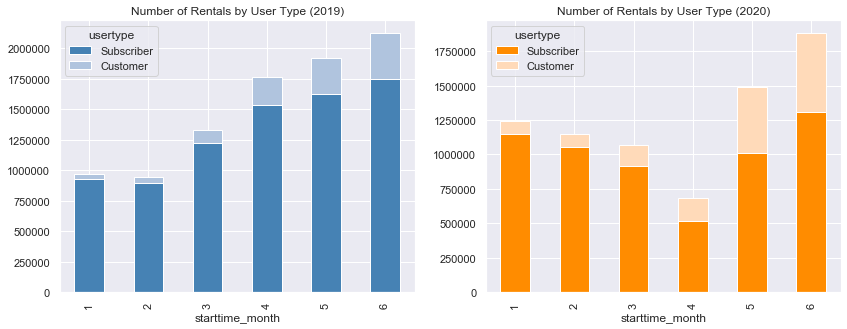

In [51]:
# try to consolidate this into one graph (double stacked bar graph)
fig, ax =plt.subplots(1,2)

df_pivot=df_final[df_final['starttime_year']==2019][['starttime_year','starttime_month','bikeid', 'usertype']]\
.groupby(['starttime_year','starttime_month','usertype'])\
.count()\
.reset_index()\
.pivot(index='starttime_month', columns='usertype', values='bikeid')\
.loc[:,['Subscriber','Customer']]\
.plot.bar(stacked=True, color=['steelblue', 'lightsteelblue'], figsize=(14,5), ax=ax[0], title='Number of Rentals by User Type (2019)')

df_pivot=df_final[df_final['starttime_year']==2020][['starttime_year','starttime_month','bikeid', 'usertype']]\
.groupby(['starttime_year','starttime_month','usertype'])\
.count()\
.reset_index()\
.pivot(index='starttime_month', columns='usertype', values='bikeid')\
.loc[:,['Subscriber','Customer']]\
.plot.bar(stacked=True, color=['darkorange', 'peachpuff'], figsize=(14,5), ax=ax[1], title='Number of Rentals by User Type (2020)')

fig.show()

### Ridership Numbers

In [28]:
# try to get a mean to summarize the data
# df_final[['starttime_year','starttime_month', 'bikeid']].groupby(['starttime_year','starttime_month']).mean()

<b> Monthly Citibike Rentals </b>

In first two months of 2020, it looked like 2020 was on track to surpass 2019 rental volumes. However, starting March, volumes in 2020 were less than 2019. Specificall, there was a sharp drop between March and April 2020, right when stay at home orders were officially announced for NYC (March 22).

Text(0, 0.5, 'Number of Rentals')

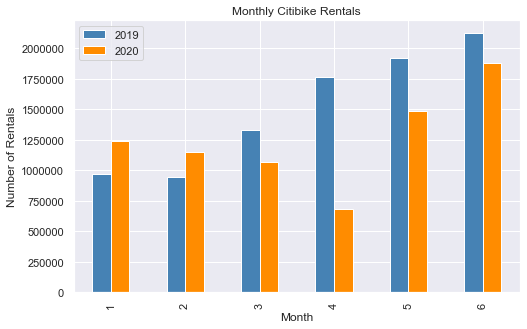

In [49]:
ax=df_final[['starttime_year','starttime_month', 'bikeid']].groupby(['starttime_year','starttime_month']).count().reset_index()\
.pivot(index='starttime_month', columns='starttime_year', values='bikeid')\
.plot.bar(title='Monthly Citibike Rentals', figsize=(8,5),color=['steelblue', 'darkorange'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=labels)

plt.xlabel('Month')
plt.ylabel('Number of Rentals')

### Trip Duration

Box plot shows us that there are a lot of extreme outliers.

Text(0.5, 1.0, 'Trip Duration in Minutes (full dataset)')

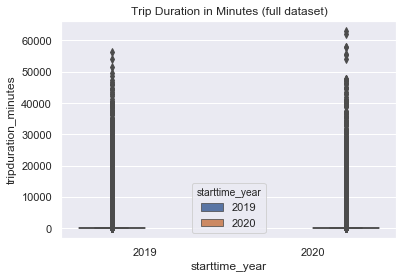

In [52]:
# add descriptive title
sns.boxplot(x='starttime_year', y='tripduration_minutes', data=df_final, hue='starttime_year')
plt.title('Trip Duration in Minutes (full dataset)')

Text(0.5, 1.0, 'Trip Duration in Minutes (filtered on trips <= 120 minutes )')

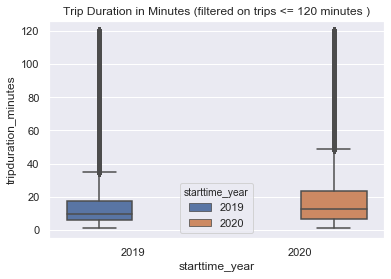

In [55]:
sns.boxplot(x='starttime_year', y='tripduration_minutes', data=df_final[(df_final['tripduration_minutes']<=120)], hue='starttime_year')
plt.title('Trip Duration in Minutes (filtered on trips <= 120 minutes )')

99% of trips are less than 120 minutes long so we'll remove any trips longer than 100 minutes.

In [23]:
round(df_final[(df_final['tripduration_min']<=120)].shape[0]/df_final.shape[0],4)

0.9935

Distritubtion of the remaining trips are positively skewed.

Text(0.5, 1.0, 'Trip Duration Distribution - 2019')

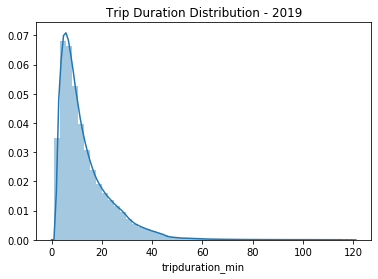

In [31]:
# create a grid plot to compare the 2019 & 2020 distributions
# change the color to differentiate the years
# relabel the x axis
sns.distplot(df_final[(df_final['starttime_year']==2019) & (df_final['tripduration_min']<=120)]['tripduration_min'])\
.set_title('Trip Duration Distribution - 2019')
# plt.title()

In [ ]:
# 2020 distplot
sns.distplot(df_final[(df_final['starttime_year']==2019) & (df_final['tripduration_minutes']<=120)]['tripduration_minutes'], color='darkorange')\
.set_title('Trip Duration Distribution - 2020').set_xlabe('minutes')

Since we removed outliers, we know that the min and max trip duration would be between 1 - 99 minutes. Let's look at the mean and median values in 2019 vs. 2020:

In [9]:
df_final[(df_final['tripduration_min']<120)][['starttime_year', 'tripduration_min']].groupby('starttime_year').mean()

,tripduration_min
starttime_year,
2019,13.301869949153561
2020,16.887988188673514


In [12]:
df_final[(df_final['tripduration_min']<100)][['starttime_year', 'tripduration_min']].groupby('starttime_year').median()

,tripduration_min
starttime_year,
2019,9.933333333333334
2020,12.65


Mean and median trip duration are higher in 2020.

### How has ridership behavior changed before & after COVID?
- Busiest times during the day
- Length of trip
- Popular stations
- Popular routes

### Were there fewer rentals during COVID?

### Are renters taking longer trips during COVID?

### Revenue before & after COVID